In [1]:
#importing a libraries to read a file

import pandas as pd
import numpy as np

In [2]:
#file reading

data=pd.read_csv('C:/Users/F/Downloads/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#getting general information about a dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
#feature 'Amount' is the transaction amount
#we have to scale features'Time' and 'Amount'
#features V1...V28 are the principal components of anonymized features
#feature 'Class' is our target feature

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['Time', 'Amount']]=scaler.fit_transform(data[['Time', 'Amount']])

In [5]:
#dividing the dataset into independent and dependent parts

X=data.drop(['Class'], axis=1)
y=data['Class']

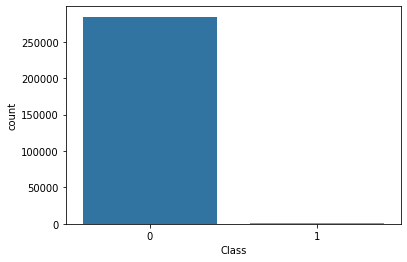

In [6]:
#class balance visualization

import seaborn as sns
sns.countplot(data['Class'], data=data)

In [7]:
#we have imbalanced data, so we will resample the data and create an undersampling subdata with an equal number of values
#firstly we have to split the target feature

frauds=data[data['Class']==1]
non_frauds=data[data['Class']==0]

In [8]:
#getting a number of values of minority class

frauds['Class'].value_counts()

1    492
Name: Class, dtype: int64

In [9]:
#creating a new feature from majority feature with values equals to value of minority class(with stirring) 

non_frauds=non_frauds.sample(n=492)

In [10]:
#new subdata with equal values of both classes

undersampled_data=pd.concat([frauds, non_frauds])
undersampled_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [11]:
#stirring new subdata

undersampled_data=undersampled_data.sample(frac=1)
undersampled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154960,0.189398,-4.517344,2.500224,-4.013928,1.189452,-2.486861,-1.413476,-4.245707,1.265087,1.168828,...,1.326944,0.102999,0.508167,-0.278018,0.139721,0.064610,-0.972358,0.351360,-0.344154,1
218431,0.979196,-1.671267,1.014907,0.851204,-0.709082,-0.440906,-0.417704,-0.166471,0.637485,0.128168,...,0.084669,0.010498,0.146990,-0.032446,-0.621337,-0.741287,-0.784590,-0.149141,-0.349231,0
150677,-0.019686,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,-0.232047,1
6336,-1.837743,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,-0.349231,1
185957,0.675457,-1.277813,-1.225610,-0.347938,-0.011148,1.469015,1.116188,0.217664,0.006542,1.250597,...,-0.282849,0.285441,0.816858,-1.665910,-2.459289,-1.222824,-0.071980,0.495263,0.079164,0


In [12]:
#dividing the whole dataset into training and test parts

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#dividing the subdata into independent and dependent parts

X_undersampled=undersampled_data.drop(['Class'], axis=1)
y_undersampled=undersampled_data['Class']

In [13]:
#importing modules to create a model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [14]:
#model creation

model=LogisticRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
penalty = ['l1', 'l2']
C=[0.01, 0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear']
hyperparameters = dict(C=C, penalty=penalty,solver=solver)
Search = GridSearchCV(model, hyperparameters, cv=cv, verbose=0, n_jobs=-1, scoring='recall')
Best_model = Search.fit(X_undersampled, y_undersampled)

In [15]:
#getting an accuracy score

from sklearn.metrics import recall_score
y_pred=Best_model.predict(X_test)
recall_score(y_test, y_pred)

0.9319727891156463